<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/rain_in_aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df['Date'] = pd.to_datetime(df["Date"], errors='coerce')
df["Year"] = df['Date'].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df = df.drop(labels="Date", axis=1)

In [ ]:
target_col = "RainTomorrow"
categorical_col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

numerical_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']

print(categorical_col, "---->" ,len(categorical_col))
print("=================")
print(numerical_col, "---->" ,len(numerical_col))



['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'] ----> 5
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'] ----> 19


Text(0.5, 1.0, 'Target Column Bar')

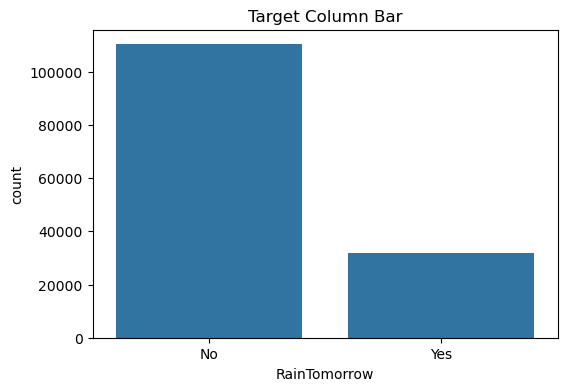

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x=target_col)
plt.title("Target Column Bar")

Plotting: Location


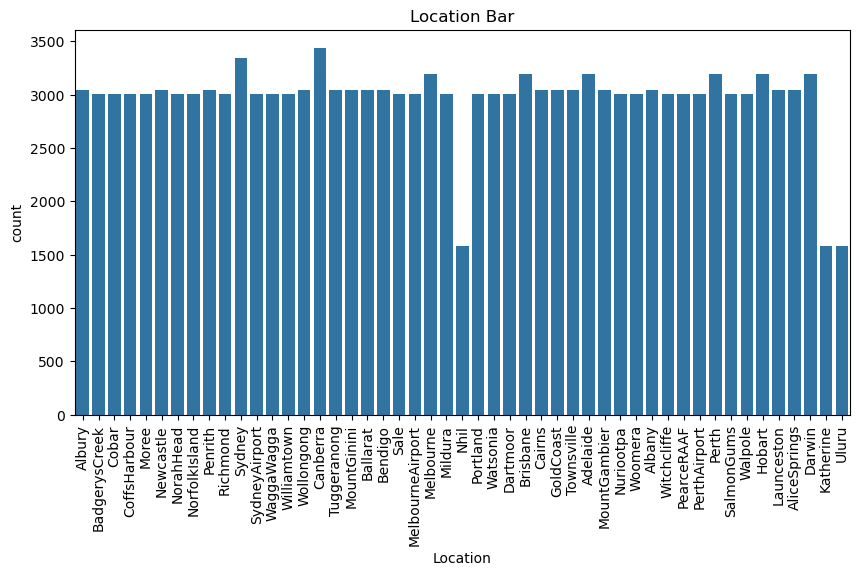

Plotting: WindGustDir


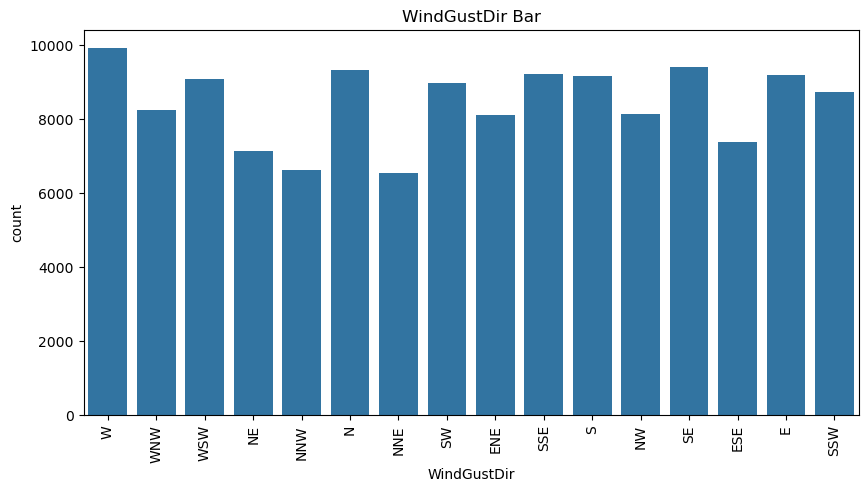

Plotting: WindDir9am


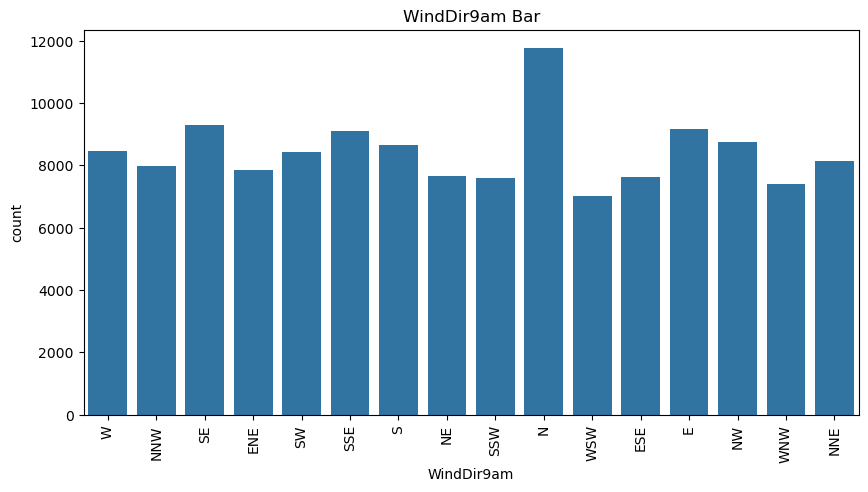

Plotting: WindDir3pm


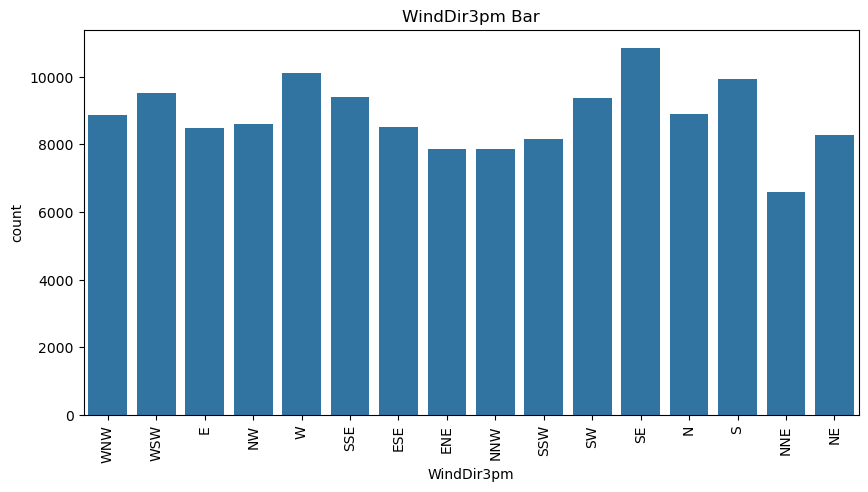

Plotting: RainToday


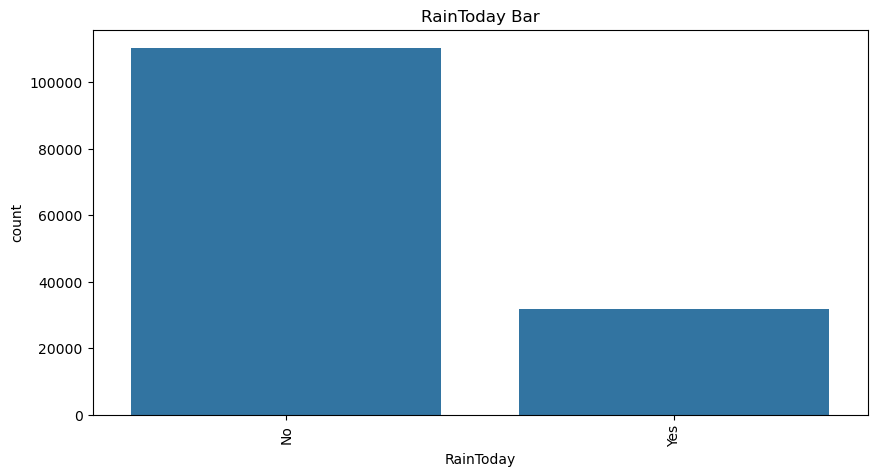

In [ ]:
for cols in categorical_col:
    print(f"Plotting: {cols}") # This proves if the loop runs 5 times
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=cols)
    plt.title(f"{cols} Bar")
    plt.xticks(rotation=90)
    plt.show()

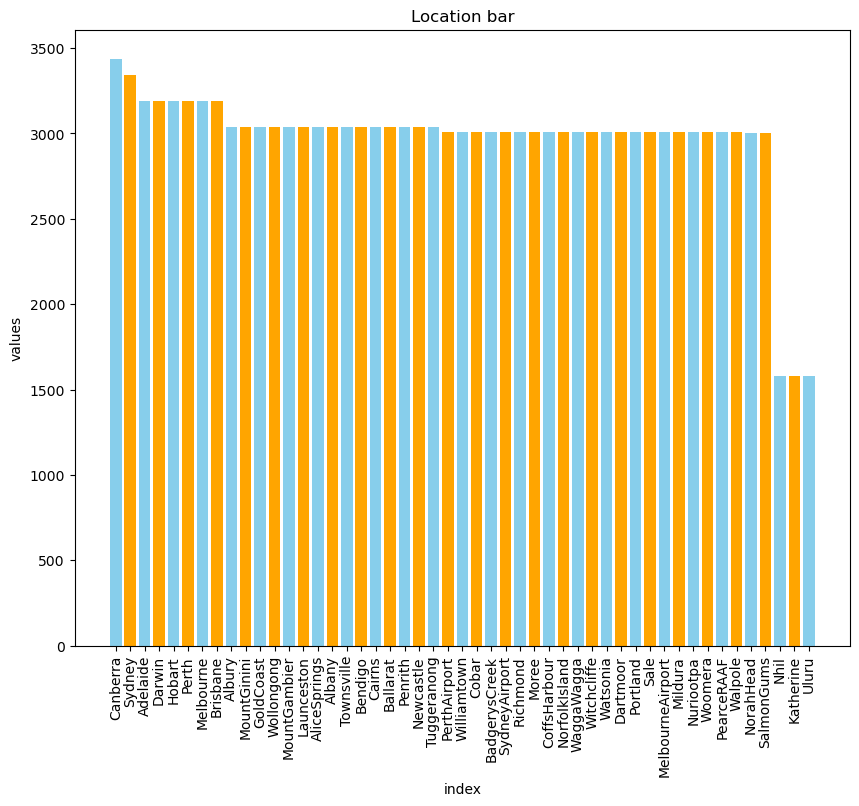

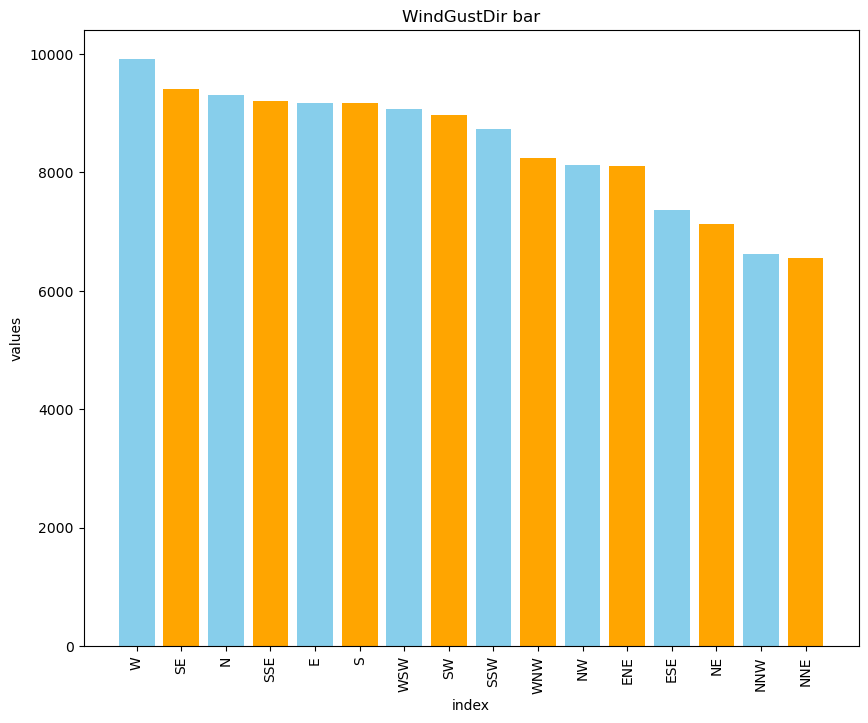

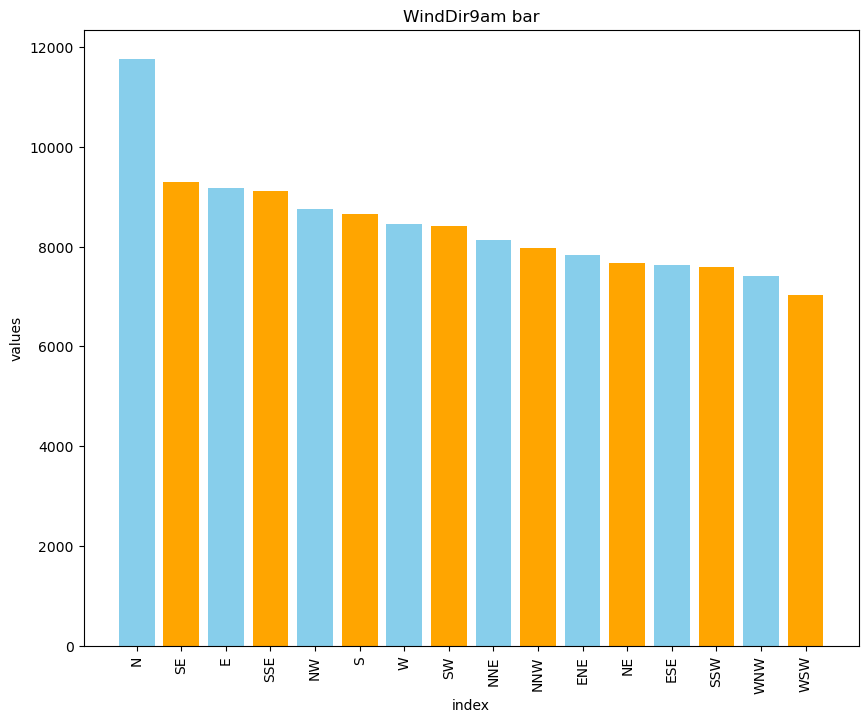

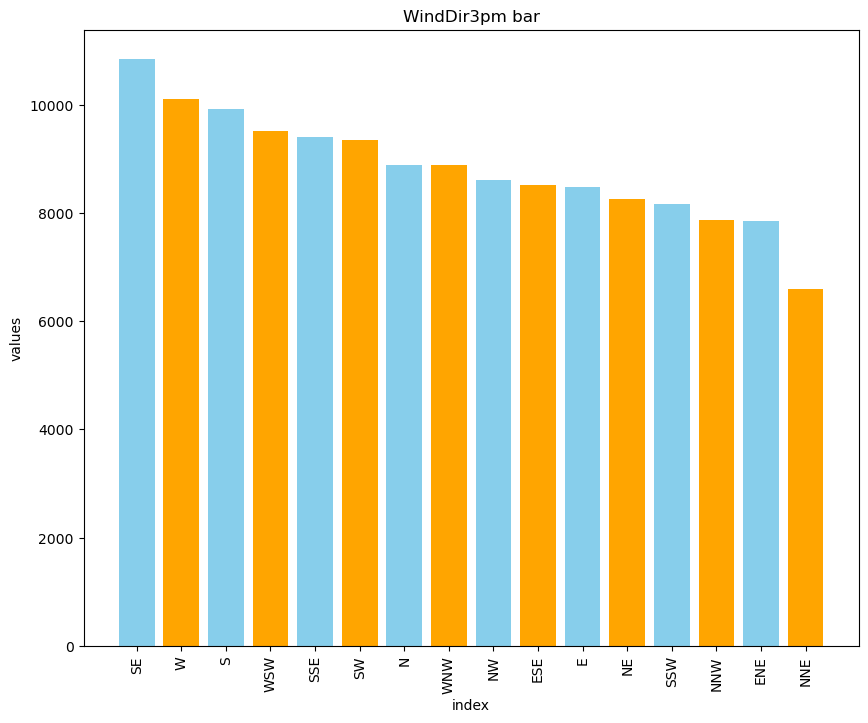

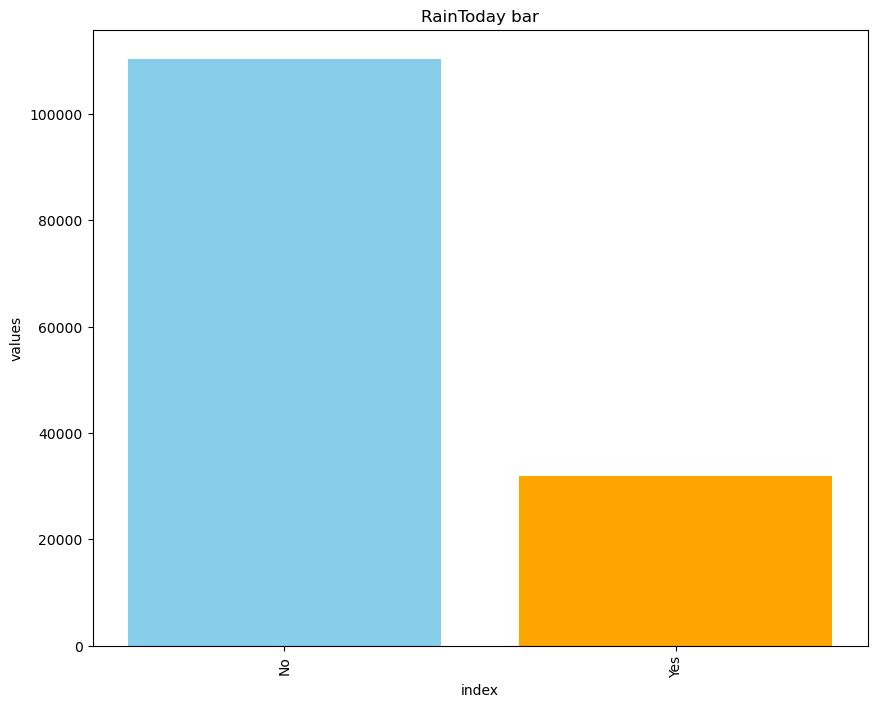

In [ ]:
for cols in categorical_col:
    plt.figure(figsize=(10,8))
    counts = df[cols].value_counts()
    # print("==========")
    # print(counts)
    # print("===============")
    plt.bar(counts.index, counts.values, color=['skyblue', 'orange'])
    plt.title(f"{cols} bar")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.xticks(rotation=90)
    plt.show()

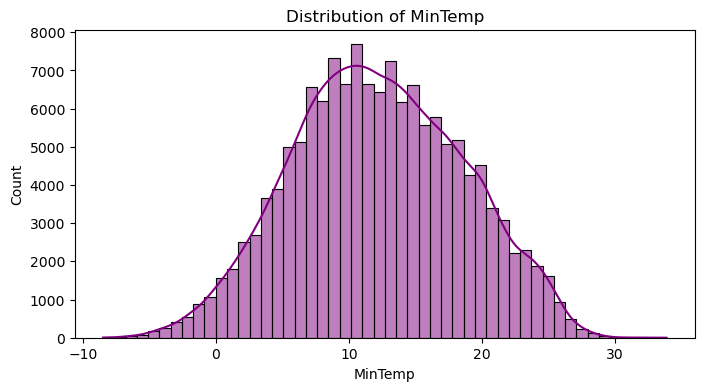

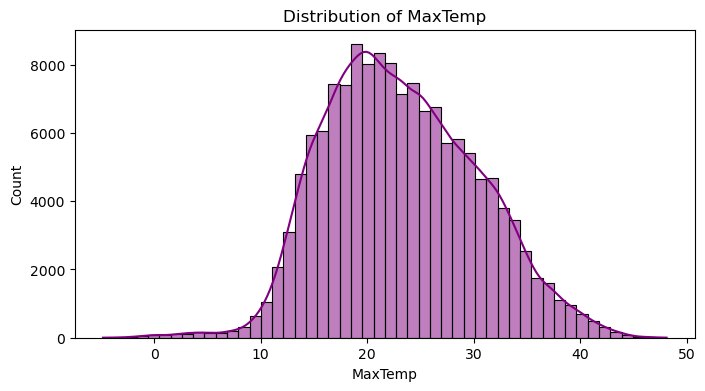

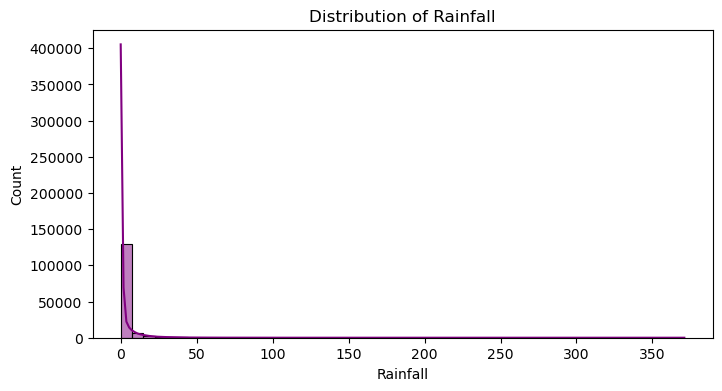

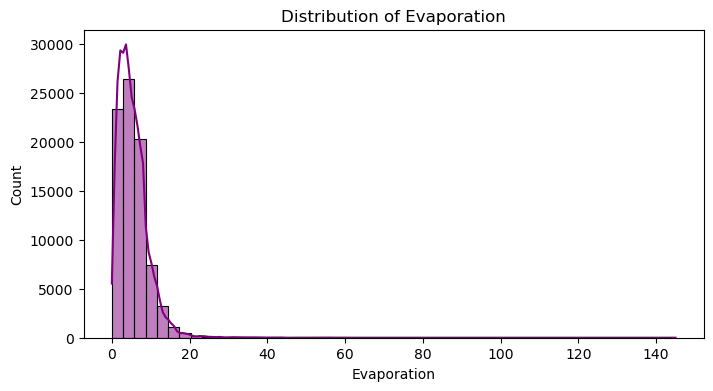

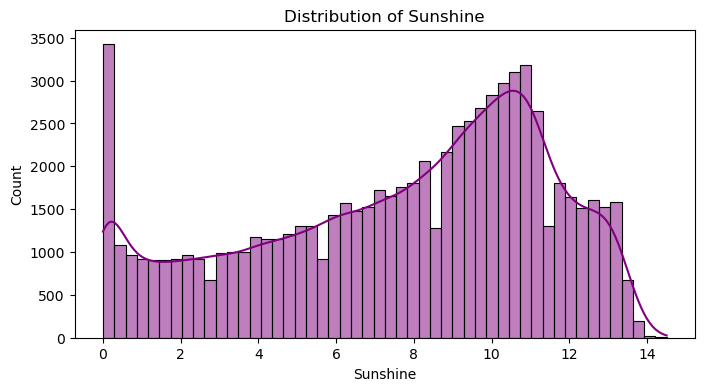

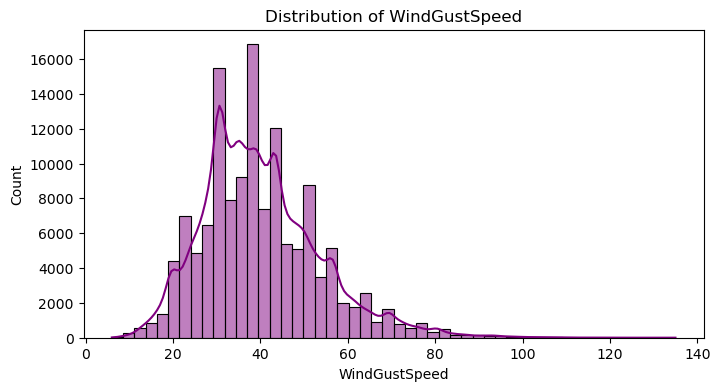

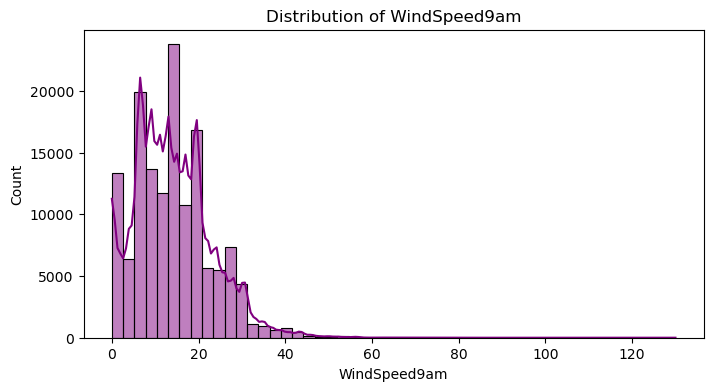

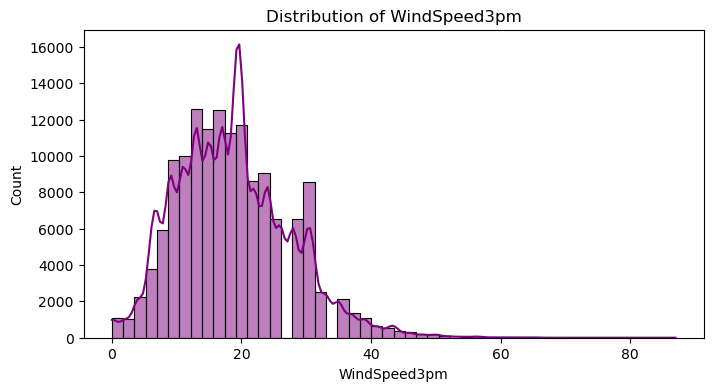

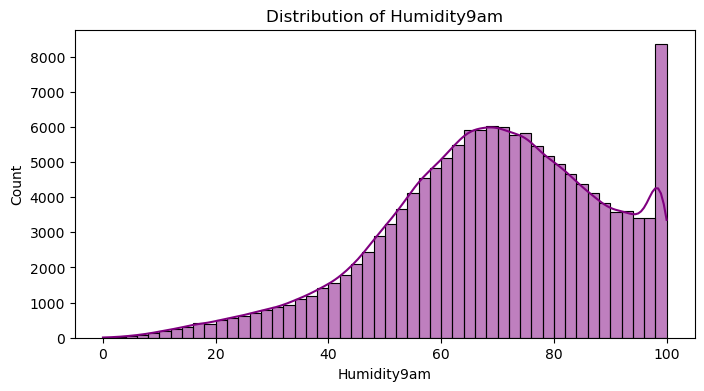

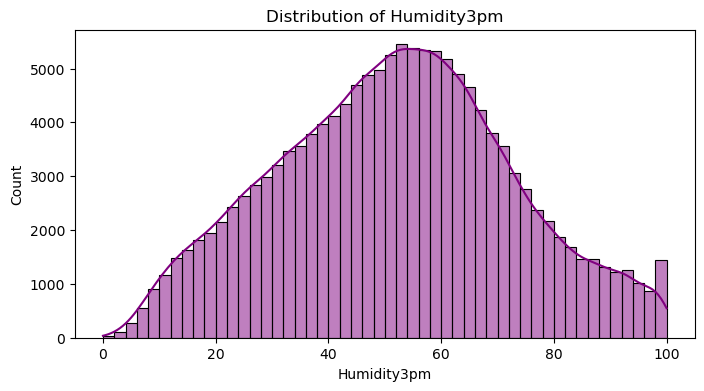

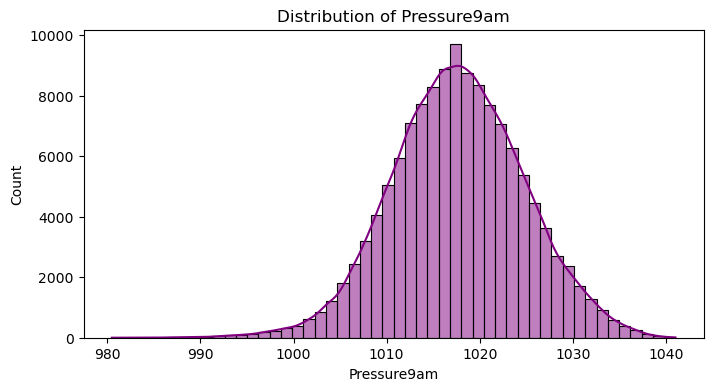

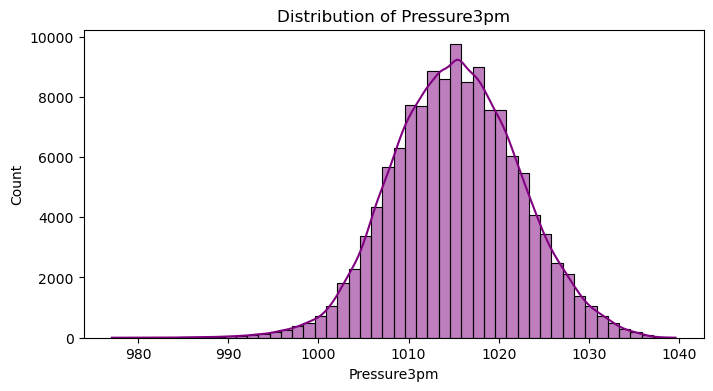

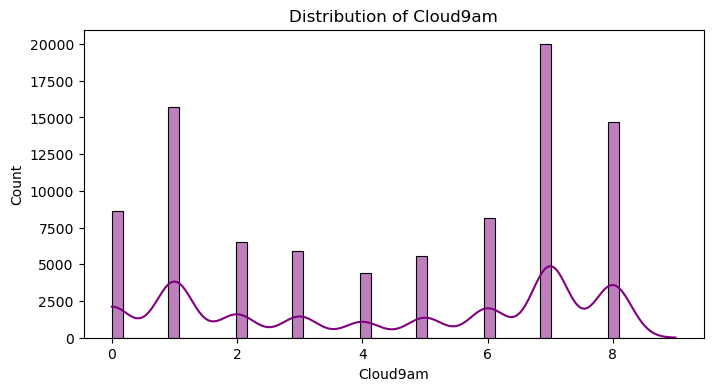

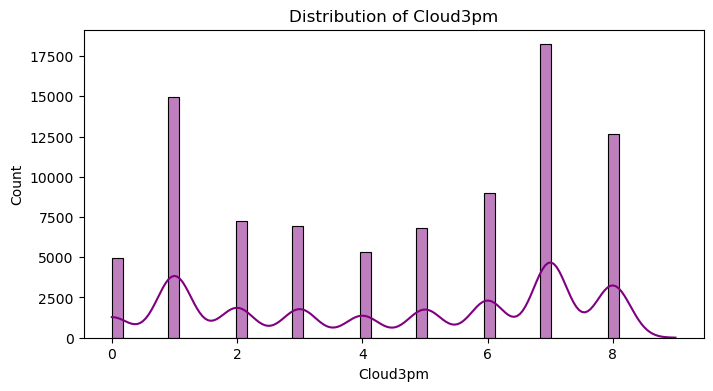

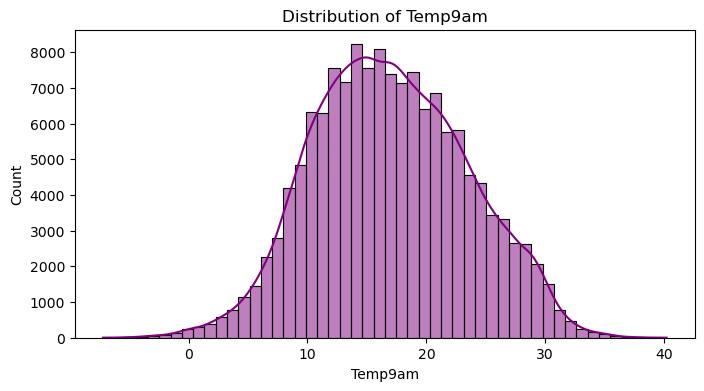

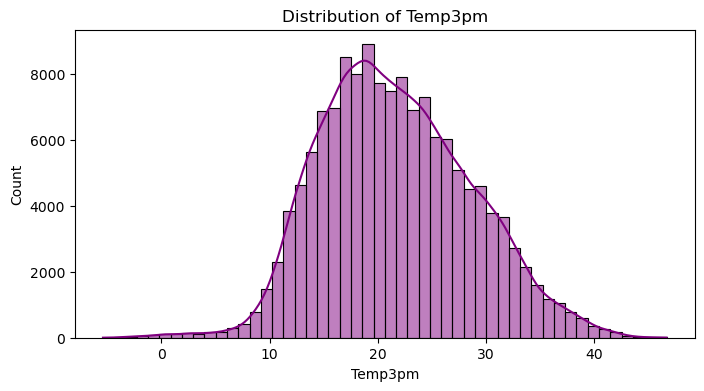

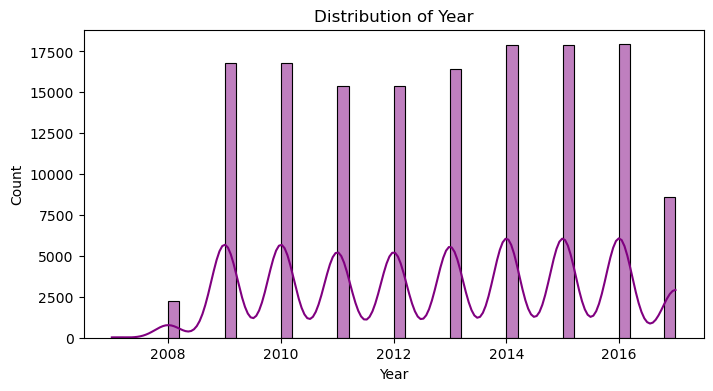

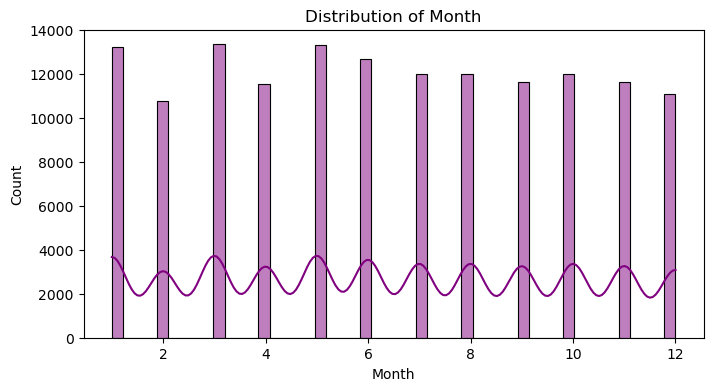

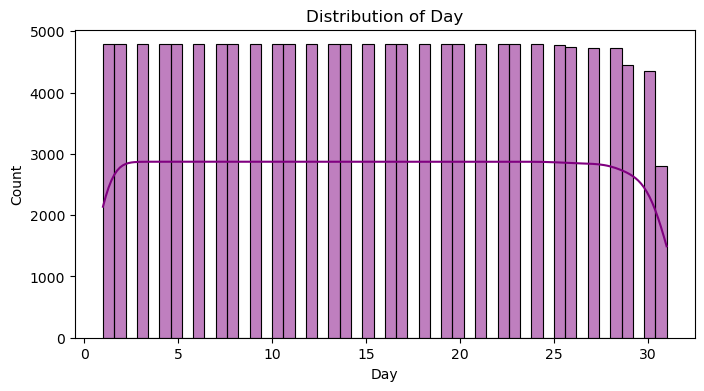

In [ ]:
for col in numerical_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, color='purple',bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
df = df.drop(columns=["Sunshine","Evaporation"])
df = df.drop(columns=["Cloud9am","Cloud3pm"])
df["MinTemp"] = df["MinTemp"].fillna(df["MinTemp"].mean())
df["Temp9am"] = df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"] = df["Temp3pm"].fillna(df["Temp3pm"].median())
df["MaxTemp"] = df["MaxTemp"].fillna(df["MaxTemp"].median())
df["WindGustSpeed"] = df["WindGustSpeed"].fillna(df["WindGustSpeed"].median())
df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df["WindSpeed9am"].median())
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].median())
df["Pressure9am"] = df["Pressure9am"].fillna(df["Pressure9am"].median())
df["Pressure3pm"] = df["Pressure3pm"].fillna(df["Pressure3pm"].median())
df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].median())
df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].median())
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].mode()[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0])
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].mode()[0])
df["Rainfall"] = df["Rainfall"].fillna(df["Rainfall"].mode()[0])
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])
df = df.dropna(subset=["RainTomorrow"])
# df["RainTomorrow"] = df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0])
df.isna().sum()


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
for cols in categorical_col:
    print(f"{cols} ======> {df[cols].nunique()}")
    print(f"{df[cols].unique()}")

Location ======> 49
[ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
WindGustDir ======> 16
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am ======> 16
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm ======> 16
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday ======> 2
[0 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
lebel = LabelEncoder()
df["Location"] = lebel.fit_transform(df["Location"])
df["RainToday"] = lebel.fit_transform(df["RainToday"])
df["WindGustDir"] = lebel.fit_transform(df["WindGustDir"])
df["WindDir3pm"] = lebel.fit_transform(df["WindDir3pm"])
df["WindDir9am"] = lebel.fit_transform(df["WindDir9am"])

In [ ]:
df["RainToday"].unique()

array([0, 1])

In [ ]:
x = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# ====================================

scalar_Std = StandardScaler().set_output(transform='pandas')
x_train_std = scalar_Std.fit_transform(x_train)
x_test_std = scalar_Std.transform(x_test)

x_train_std.head()



,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
18401,0.159847,0.458003,0.095453,-0.275735,0.626095,2.064725,-0.001146,1.145829,0.567180,0.386577,-1.627919,0.804606,-2.332677,-1.922876,0.435324,-1.072486,-0.534010,-1.478581,1.051347,-0.194129
127797,1.353637,-0.387865,-1.268856,0.626257,1.478214,0.769746,1.550119,1.145829,0.114820,1.075510,1.169788,0.220135,-1.399388,-1.129926,-0.909233,-1.203441,1.872623,-0.691642,0.759234,1.169916
40012,1.494083,0.160383,0.306428,-0.275735,-1.504203,-0.753759,1.328510,-1.713696,-0.902990,-0.187534,0.536345,0.561076,1.119013,0.934739,0.651690,0.338929,-0.534010,-1.085111,-0.701332,0.487893
130914,-0.612606,-0.716813,-1.184466,-0.275735,1.265184,4.121456,1.550119,1.365793,1.811169,1.879266,-0.888902,-0.315630,-1.932696,-2.072490,-0.909233,-1.276195,-0.534010,-0.691642,0.175008,-0.421470
41742,1.494083,0.113390,-0.143653,-0.275735,-0.012995,-0.220532,1.106901,0.485939,0.114820,0.156933,0.008476,0.025312,0.793102,0.889855,0.280778,-0.155794,-0.534010,0.882237,-0.701332,-0.307800


In [ ]:
x_test_std.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
57760,-1.314836,-0.795134,-1.437637,0.768677,-1.078144,0.084169,-0.887583,1.365793,1.132629,0.386577,1.644870,2.265782,-2.362306,-1.474036,-1.295601,-1.479904,1.872623,1.275706,-0.117106,-0.762481
127128,1.353637,0.160383,-0.692190,-0.275735,-1.717233,0.617395,-1.109192,-1.273769,1.132629,0.156933,0.219623,1.048135,1.474552,1.278849,-0.430138,-0.679618,-0.534010,-1.478581,1.051347,0.942575
119994,0.581184,-0.466186,-0.073328,-0.275735,-1.504203,0.922096,-1.330801,-1.273769,1.358809,0.156933,-1.258410,-1.289747,1.844905,1.593037,-0.291046,0.120669,-0.534010,0.882237,0.759234,0.601564
7088,-0.963721,0.489331,0.404883,-0.275735,-1.717233,0.312695,-1.552410,-0.833842,1.132629,0.042111,-1.100050,-0.559159,-0.658682,-0.815738,0.079867,0.382581,-0.534010,-0.691642,1.635573,-1.103492
62992,0.791853,-0.043252,1.206591,-0.275735,-0.226025,2.445601,-1.552410,-1.053806,-0.902990,0.042111,1.064214,-1.289747,-1.621600,-2.132335,-0.121044,0.833651,-0.534010,0.488767,-0.993445,-0.080459


In [ ]:
x_train_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 18401 to 124925
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       113754 non-null  float64
 1   MinTemp        113754 non-null  float64
 2   MaxTemp        113754 non-null  float64
 3   Rainfall       113754 non-null  float64
 4   WindGustDir    113754 non-null  float64
 5   WindGustSpeed  113754 non-null  float64
 6   WindDir9am     113754 non-null  float64
 7   WindDir3pm     113754 non-null  float64
 8   WindSpeed9am   113754 non-null  float64
 9   WindSpeed3pm   113754 non-null  float64
 10  Humidity9am    113754 non-null  float64
 11  Humidity3pm    113754 non-null  float64
 12  Pressure9am    113754 non-null  float64
 13  Pressure3pm    113754 non-null  float64
 14  Temp9am        113754 non-null  float64
 15  Temp3pm        113754 non-null  float64
 16  RainToday      113754 non-null  float64
 17  Year           113754 non-null